<a href="https://colab.research.google.com/github/sashilfe/Projeto_Restic36_Dados/blob/main/Av9_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SAULO ALVES e THAILANE CARMO

##Projeto: Implementação e Análise do Algoritmo de Regressão Linear

##Sobre a Base de Dados
Este projeto utiliza um conjunto de dados que reúne informações detalhadas sobre os principais influenciadores do Instagram, abrangendo 10 categorias diferentes. A base inclui perfis com alto número de seguidores, alto engajamento e amplo alcance, oferecendo uma visão abrangente das dinâmicas e tendências entre os influenciadores.

##Aplicações Potenciais 🛠️
A base de dados é uma ferramenta útil para:

* identificar tendências em mídias sociais;
* Analisar o comportamento e o desempenho de influenciadores;
* Marcas auxiliares na seleção de perfis adequados para campanhas de marketing.

#Objetivo do Projeto 🎯
O objetivo deste projeto é desenvolver um modelo preditivo utilizando o algoritmo de Regressão Linear para estimar a taxa de engajamento dos principais influenciadores do Instagram. O modelo será aplicado à base de dados "Top Instagram Influencers Data" , disponível no Kaggle.

Para mais informações e acesso à base de dados, consulte o link:
[Top Instagram Influencers Data](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned/data) (Kaggle)

##Sobre este arquivo
Neste arquivo, basicamente há 10 atributos. Ele foi ordenado com base na classificação que foi decidida com base em "seguidores".

* rank: Classificação do Influenciador com base no número de seguidores que ele tem
* channel_info: Nome de usuário do Instagrammer
* influence score: Pontuação de influência dos usuários. É calculado com base em menções, importância e popularidade
* posts: Número de posts que eles fizeram até agora
* followers: Número de seguidores do usuário
* avg_likes: Média de curtidas em posts do Instagrammer **(total Likes/total posts)**
* 60_day_eng_rate: Taxa de engajamento dos últimos 60 dias do Instagrammer como * facção de engajamentos que eles fizeram até agora
* new_post_avg_like: Média de curtidas que eles têm em novos posts
* total Likes: Total de curtidas que o usuário obteve em seus posts. **(em bilhões)**
* country: País ou região de origem do usuário.

# Importando as bibliotecas

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import tree
# Modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
# Métricas para a avaliação do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Data frame

In [ ]:
# Carregando o dataset
df = pd.read_csv('./Insta_dados.csv')
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
# Vamos renomear as colunas para facilitar a manipulação dos dados
df.rename(columns={'rank': 'Classificação'}, inplace=True)
df.rename(columns={'channel_info': 'Nome'}, inplace=True)
df.rename(columns={'influence_score': 'Pontuação'}, inplace=True)
df.rename(columns={'posts': 'Postagens'}, inplace=True)
df.rename(columns={'followers': 'Seguidores'}, inplace=True)
df.rename(columns={'avg_likes': 'Media_Curtidas'}, inplace=True)
df.rename(columns={'60_day_eng_rate': 'Taxa_Engajamento'}, inplace=True)
df.rename(columns={'new_post_avg_like': 'Media_Curtidas_Novas'}, inplace=True)
df.rename(columns={'total_likes': 'Likes'}, inplace=True)
df.rename(columns={'country': 'País'}, inplace=True)

In [ ]:
#visualizando o data set
df

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


# Análise Inicial
Exploramos a estrutura, qualidade e principais características da base, identificando padrões e insights preliminares.

In [ ]:
# Exibe informações sobre o dataset
df.head(10)

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [ ]:
# Gerar um resumo conciso das estatísticas descritivas
df.describe()

,Classificação,Pontuação
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [ ]:
# Verificar a ausencia de valores em alguma coluna
df.isna().sum()

,0
Classificação,0
Nome,0
Pontuação,0
Postagens,0
Seguidores,0
Media_Curtidas,0
Taxa_Engajamento,0
Media_Curtidas_Novas,0
Likes,0
País,62


In [ ]:
# Vizualizar os nomes das colunas
df.columns

Index(['Classificação', 'Nome', 'Pontuação', 'Postagens', 'Seguidores',
       'Media_Curtidas', 'Taxa_Engajamento', 'Media_Curtidas_Novas', 'Likes',
       'País'],
      dtype='object')

In [ ]:
# Testar os valores da coluna Nome
df['Nome'].value_counts()

,count
Nome,
cristiano,1
kapilsharma,1
maisa,1
luissuarez9,1
gusttavolima,1
...,...
roses_are_rosie,1
manchesterunited,1
anushkasharma,1


# Engenharia de Atributos
Nesta etapa, realizaremos transformações nas variáveis ​​do conjunto de dados para compreender como a variável alvo responde às alterações

In [ ]:
df_dados = pd.DataFrame()

# Vamos aplicar a função à coluna "Seguidores"
df_dados['Influenciador'] = df['Nome']
df_dados['Classificação'] = df['Classificação']

def convert_postagens(value):
    if isinstance(value, str):  # Verifica se o valor é uma string
        if 'm' in value:
            return float(value.replace('m', '')) * 1000000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1000000000
        else:
            return float(value)  # Caso não tenha 'm', 'k' ou 'b'
    else:
        return value  # Se já for numérico, retorna o valor como está

# Aplicar a função de conversão para colunas relevantes
df_dados['Postagens'] = df['Postagens'].apply(convert_postagens)
df_dados['Seguidores'] = df['Seguidores'].apply(convert_postagens)
df_dados['Media_Curtidas'] = df['Media_Curtidas'].apply(convert_postagens)
df_dados['Media_Curtidas_Novas'] = df['Media_Curtidas_Novas'].apply(convert_postagens)

# Converter a taxa de engajamento para um número decimal
df_dados["Taxa_Engajamento"] = df["Taxa_Engajamento"].str.replace("%", "", regex=True).astype(float) / 100

# Adicionar a coluna de País
df_dados['País'] = df['País']

# Visualizar o DataFrame final
print(df_dados.head())  # Mostrar as primeiras linhas do novo DataFrame após o pré-processamento

  Influenciador  Classificação  Postagens   Seguidores  Media_Curtidas  \
0     cristiano              1     3300.0  475800000.0       8700000.0   
1   kyliejenner              2     6900.0  366200000.0       8300000.0   
2      leomessi              3      890.0  357300000.0       6800000.0   
3   selenagomez              4     1800.0  342700000.0       6200000.0   
4       therock              5     6800.0  334100000.0       1900000.0   

   Media_Curtidas_Novas  Taxa_Engajamento           País  
0             6500000.0            0.0139          Spain  
1             5900000.0            0.0162  United States  
2             4400000.0            0.0124            NaN  
3             3300000.0            0.0097  United States  
4              665300.0            0.0020  United States  


# Avaliando a nova base de dados

In [ ]:
df_dados.head(10)

,Influenciador,Classificação,Postagens,Seguidores,Media_Curtidas,Media_Curtidas_Novas,Taxa_Engajamento,País
0,cristiano,1,3300.0,475800000.0,8700000.0,6500000.0,0.0139,Spain
1,kyliejenner,2,6900.0,366200000.0,8300000.0,5900000.0,0.0162,United States
2,leomessi,3,890.0,357300000.0,6800000.0,4400000.0,0.0124,NaN
3,selenagomez,4,1800.0,342700000.0,6200000.0,3300000.0,0.0097,United States
4,therock,5,6800.0,334100000.0,1900000.0,665300.0,0.0020,United States
5,kimkardashian,6,5600.0,329200000.0,3500000.0,2900000.0,0.0088,United States
6,arianagrande,7,5000.0,327700000.0,3700000.0,3900000.0,0.0120,United States
7,beyonce,8,2000.0,272800000.0,3600000.0,2000000.0,0.0076,United States
8,khloekardashian,9,4100.0,268300000.0,2400000.0,926900.0,0.0035,United States
9,justinbieber,10,7400.0,254500000.0,1900000.0,1500000.0,0.0059,Canada


In [ ]:
#Verificar as informações do BD
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influenciador         200 non-null    object 
 1   Classificação         200 non-null    int64  
 2   Postagens             200 non-null    float64
 3   Seguidores            200 non-null    float64
 4   Media_Curtidas        200 non-null    float64
 5   Media_Curtidas_Novas  200 non-null    float64
 6   Taxa_Engajamento      199 non-null    float64
 7   País                  138 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


In [ ]:
# Gerar um resumo conciso das estatísticas descritivas
df_dados.describe()

,Classificação,Postagens,Seguidores,Media_Curtidas,Media_Curtidas_Novas,Taxa_Engajamento
count,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,199.000000
mean,100.500000,3499.850000,7.740950e+07,1.787104e+06,1.208132e+06,0.019020
std,57.879185,3475.828158,7.368727e+07,2.193359e+06,1.858322e+06,0.033297
min,1.000000,10.000000,3.280000e+07,6.510000e+04,0.000000e+00,0.000100
25%,50.750000,947.500000,4.000000e+07,5.044000e+05,1.957500e+05,0.004100
50%,100.500000,2100.000000,5.005000e+07,1.100000e+06,5.321500e+05,0.008800
75%,150.250000,5025.000000,6.890000e+07,2.100000e+06,1.325000e+06,0.020350
max,200.000000,17500.000000,4.758000e+08,1.540000e+07,1.260000e+07,0.264100


In [ ]:
#identificar o valores nulos no date frame
df_dados.isnull().sum()

,0
Influenciador,0
Classificação,0
Postagens,0
Seguidores,0
Media_Curtidas,0
Media_Curtidas_Novas,0
Taxa_Engajamento,1
País,62


In [ ]:
# Caso tenha um valor nulo, ele sera substituido pela mediana da coluna.
df_dados['Taxa_Engajamento'] = df_dados['Taxa_Engajamento'].fillna(df_dados['Taxa_Engajamento'].median())

# Substitui os 62 valores nulos pela moda (país que mais aparece)

df_dados['País'] = df_dados['País'].fillna(df_dados['País'].mode()[0])

df_dados.info()
df_dados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influenciador         200 non-null    object 
 1   Classificação         200 non-null    int64  
 2   Postagens             200 non-null    float64
 3   Seguidores            200 non-null    float64
 4   Media_Curtidas        200 non-null    float64
 5   Media_Curtidas_Novas  200 non-null    float64
 6   Taxa_Engajamento      200 non-null    float64
 7   País                  200 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


,Influenciador,Classificação,Postagens,Seguidores,Media_Curtidas,Media_Curtidas_Novas,Taxa_Engajamento,País
0,cristiano,1,3300.0,475800000.0,8700000.0,6500000.0,0.0139,Spain
1,kyliejenner,2,6900.0,366200000.0,8300000.0,5900000.0,0.0162,United States
2,leomessi,3,890.0,357300000.0,6800000.0,4400000.0,0.0124,United States
3,selenagomez,4,1800.0,342700000.0,6200000.0,3300000.0,0.0097,United States
4,therock,5,6800.0,334100000.0,1900000.0,665300.0,0.0020,United States


# Tratemento de dados categoricos (Influenciador e País)

In [ ]:
#transformar variaveis categóricas em númericas, "Influenciador" e "País", utilizando a LabelEncoder
label_encoders = {}
for column in ['Influenciador', 'País']:
    le = LabelEncoder()
    df_dados[column] = le.fit_transform(df_dados[column])
    label_encoders[column] = le

# Avaliando as variaveis atraves da correlação

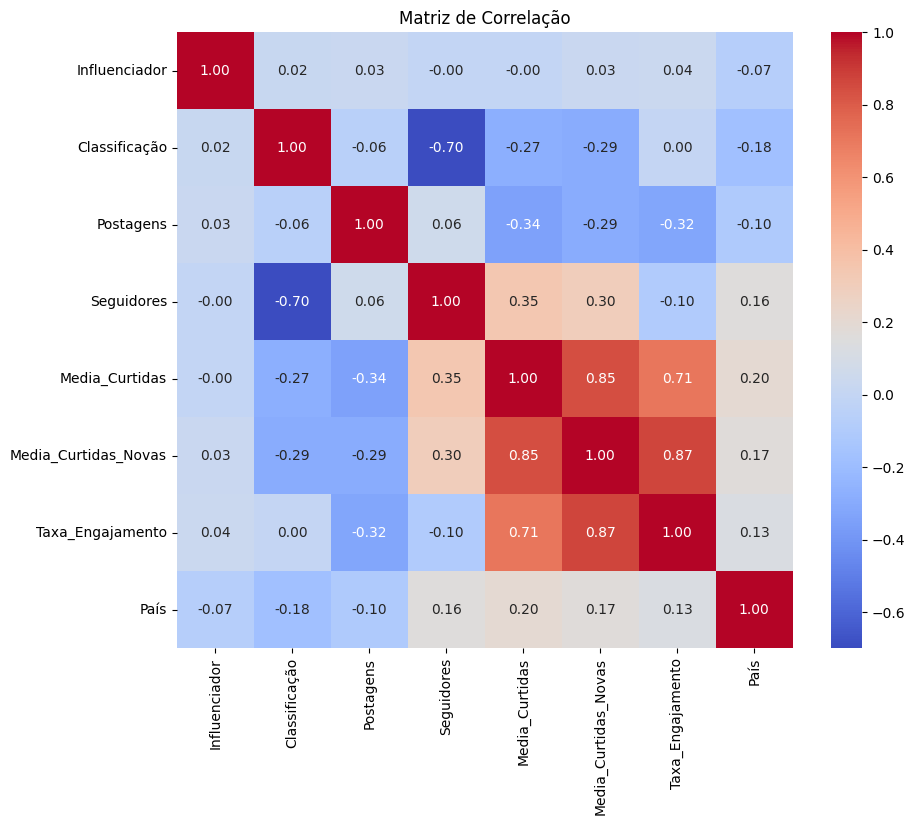

In [ ]:
# Visualizando inicialmente a correlação
matriz_correlacao =  df_dados.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Verificando as correlações de cada variavel
correlation_matrix = df_dados.corr()
print("\nMatriz de correlação:\n")
print(correlation_matrix)


Matriz de correlação:

                      Influenciador  Classificação  Postagens  Seguidores  \
Influenciador              1.000000       0.021077   0.025776   -0.004212   
Classificação              0.021077       1.000000  -0.059136   -0.698757   
Postagens                  0.025776      -0.059136   1.000000    0.060398   
Seguidores                -0.004212      -0.698757   0.060398    1.000000   
Media_Curtidas            -0.003248      -0.274343  -0.343087    0.349195   
Media_Curtidas_Novas       0.030339      -0.288734  -0.290080    0.300914   
Taxa_Engajamento           0.037207       0.002427  -0.321705   -0.099957   
País                      -0.070178      -0.180156  -0.104131    0.163707   

                      Media_Curtidas  Media_Curtidas_Novas  Taxa_Engajamento  \
Influenciador              -0.003248              0.030339          0.037207   
Classificação              -0.274343             -0.288734          0.002427   
Postagens                  -0.343087      

In [ ]:
# Verificar o grau de importancia da variavel na correlação
important_columns = correlation_matrix['Taxa_Engajamento'].sort_values(ascending=False)
print("\nColunas mais importantes, com base na correlação:")
print(important_columns)


Colunas mais importantes, com base na correlação:
Taxa_Engajamento        1.000000
Media_Curtidas_Novas    0.869073
Media_Curtidas          0.714351
País                    0.126732
Influenciador           0.037207
Classificação           0.002427
Seguidores             -0.099957
Postagens              -0.321705
Name: Taxa_Engajamento, dtype: float64


##Análise de Correlação 💡
Realizou-se uma análise entre a variável dependente Taxa_Engajamentoe as variáveis ​​independentes do modelo. Abaixo dos níveis de brilho observados:

* Alta Correlação Positiva
1. Media_Curtidas_Novas (0,869): Forte relação direta, sendo a variável mais relevante para o modelo.
2. Media_Curtidas (0,714): Correlação positiva significativa, demonstrando relevância na explicação da variável dependente.




* Correlação Positiva Moderada a Fraca
1. País (0,127): Relação positiva, mas de baixa magnitude.
2. Influenciador (0,037) e Classificação (0,002): Correlação praticamente inexistente.

* Correlação Negativa
1. Seguidores (-0,100): Pequena relação inversa com a taxa de engajamento.
2. Postagens (-0,322): Relação inversa moderada, sugerindo que um maior número de mensagens pode estar associado a uma menor taxa de engajamento.

* As variáveis ​​selecionadas para o modelo foram:

1. Media_Curtidas_Novas (0,869)
2. Media_Curtidas (0,714)

Estas são de maior relevância para prever a Taxa_Engajamento.

# Usando o VIF para verificar a multicolinearidade

In [ ]:
# Usando o VIF para verificar a multicolinearidade
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# vamo excluir as colunas não numéricas e a variável alvo:
variaveis_independentes = df_dados.drop (columns = ['Taxa_Engajamento'])

variaveis_independentes = sm.add_constant (variaveis_independentes)  #-> add uma constante pra interceptação
vif = pd.DataFrame()
vif ["Variável"] = variaveis_independentes.columns
vif ["VIF"] = [variance_inflation_factor (variaveis_independentes.values, i) for i in range (variaveis_independentes.shape [1])]
print (vif)

               Variável        VIF
0                 const  27.142000
1         Influenciador   1.010406
2         Classificação   2.019417
3             Postagens   1.191250
4            Seguidores   2.111342
5        Media_Curtidas   3.900003
6  Media_Curtidas_Novas   3.603287
7                  País   1.070629


Foi realizada uma verificação de multicolinearidade entre as variáveis ​​independentes do modelo utilizando o Variance Inflation Factor (VIF) . Todas as variáveis ​​obtiveram valores de VIF abaixo de 5, diminuindo baixa multicolinearidade e confirmando sua adequação ao modelo proposto.

O **intercepto (const)** apresentou um valor elevado **(27,14)**, o que é esperado e não apresenta qualidades na análise.

As variáveis Media_Curtidas ​​e Media_Curtidas_Novas registraram os maiores valores de VIF (3,90 e 3,60, respectivamente), diminuindo um nível moderado de demonstração entre elas, mas ainda dentro de limites aceitáveis. As demais variáveis ​​variaram valores baixos, reforçando sua independência.

Conclusão:
O modelo é mostrado adequado ao ponto de vista de multicolinearidade, sem necessidade de configurações nas variáveis ​​selecionadas. A análise permanece robusta para interpretação e modelagem.

# Utilizando o bloxplot para visualisar os oultiers

O boxplot é uma ferramenta gráfica amplamente utilizada na análise exploratória de dados, permitindo identificar outliers e compreender a distribuição dos dados. Ele fornece uma visualização clara e intuitiva da dispersão , tendência central e da presença de valores extremos , sendo essencial para uma análise inicial dos padrões nos dados.

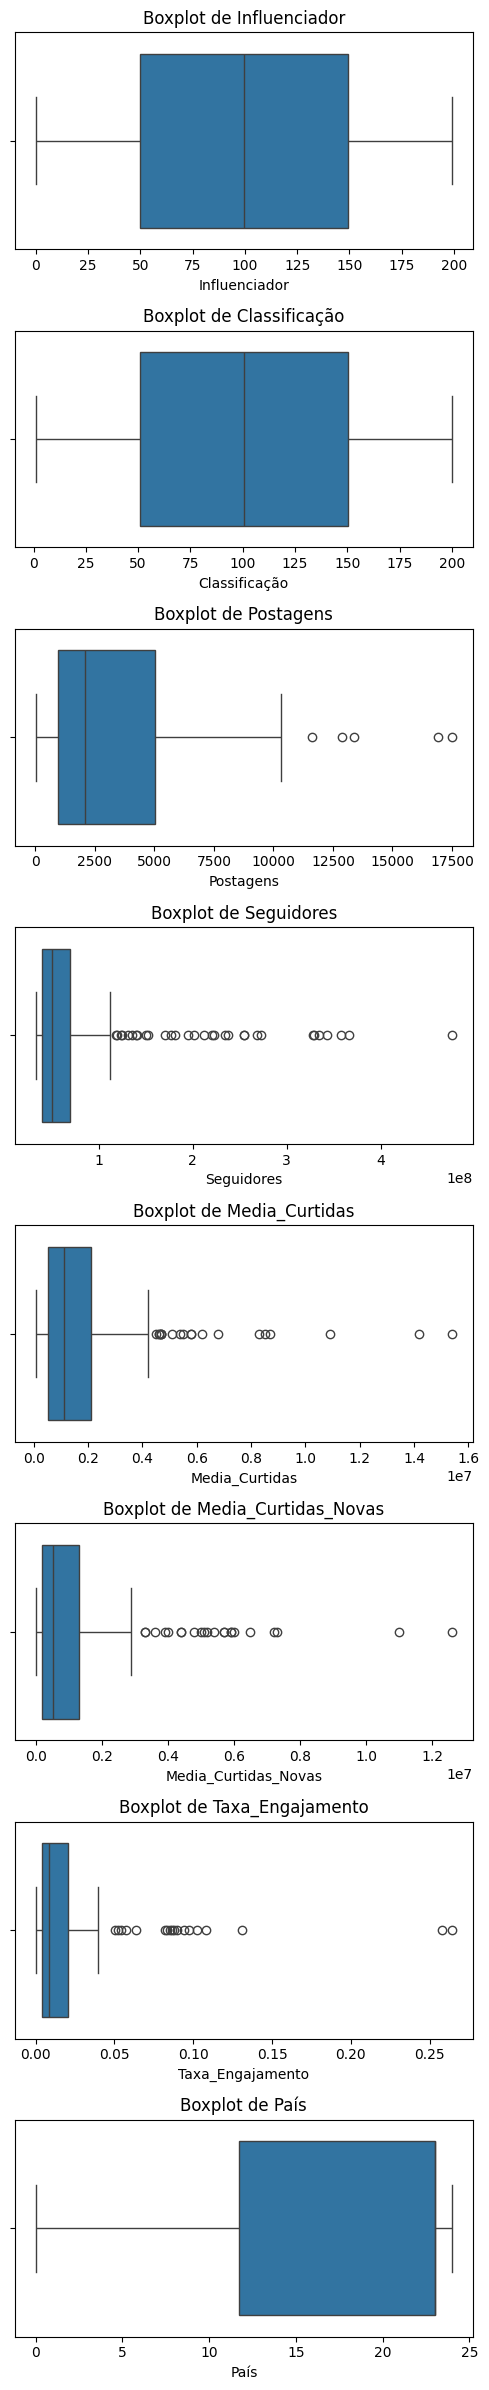

In [ ]:
def box(df_dados):

  # Seleciona colunas numéricas
  colunas_numericas = df_dados.select_dtypes(include=['int64', 'float64']).columns
  colunas_numericas = [col for col in colunas_numericas if df_dados[col].nunique() > 2]

  # Visualiza Outliers com Boxplot
  plt.figure(figsize=(5, len(colunas_numericas) * 3))
  for i, col in enumerate(colunas_numericas, 1):
    plt.subplot(len(colunas_numericas), 1, i)
    sns.boxplot(x=df_dados[col])
    plt.title(f'Boxplot de {col}')

  plt.tight_layout()
  plt.show()


box(df_dados)

Após a análise com o boxplot , foram identificados outliers representados por pontos isolados nos gráficos. Esses valores extremos apareceram nas variações:

* Media_Curtidas
* Postagens
* Seguidores
* Media_Curtidas_Novas
* Taxa_Engajamento

A presença desses outliers destaca a importância de aplicar um tratamento adequado , minimizando seu impacto na qualidade dos dados e no desempenho dos modelos. Essa abordagem é essencial para garantir maior confiabilidade nas análises subsequentes e nos resultados obtidos.

# Método IQR

A correção de outliers utilizando o método IQR (Interquartile Range) é uma etapa fundamental para garantir que o modelo seja robusto , confiável e interprete os dados de forma verificados à realidade.

Cálculo do IQR
O IQR é calculado como a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1):

IQR=Q3−Q1

Critério para outliers:

Valores abaixo de
𝑄1−1.5 × IQR

Valores acima de
𝑄3 +1.5 × IQR

Os pontos fora desses limites são considerados outliers e podem ser tratados para melhorar a qualidade dos dados, seja removendo-os ou ajustando-os conforme a necessidade do modelo.


In [ ]:
df_dados.describe()

colunas = ['Media_Curtidas', 'Postagens', 'Seguidores', 'Media_Curtidas_Novas', 'Taxa_Engajamento']
# Utilizando a técnica IQR
for coluna in colunas:
  Q1 = df_dados [coluna].quantile (0.25)
  Q3 = df_dados [coluna]. quantile (0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  df_dados = df_dados [(df_dados [coluna] >= limite_inferior) & (df_dados [coluna] <= limite_superior)]

df_dados

,Influenciador,Classificação,Postagens,Seguidores,Media_Curtidas,Media_Curtidas_Novas,Taxa_Engajamento,País
33,50,34,1300.0,85900000.0,2100000.0,1100000.0,0.0126,22
34,54,35,1700.0,85600000.0,1400000.0,586500.0,0.0069,23
35,189,36,1800.0,82300000.0,1400000.0,482300.0,0.0060,23
36,127,37,3600.0,81300000.0,1200000.0,1200000.0,0.0153,23
37,149,38,3600.0,81100000.0,1600000.0,802900.0,0.0100,23
...,...,...,...,...,...,...,...,...
195,66,196,2300.0,33200000.0,623800.0,464700.0,0.0140,23
196,125,197,3800.0,33200000.0,390400.0,208000.0,0.0064,8
197,108,198,770.0,33200000.0,193300.0,82600.0,0.0026,2
198,136,199,2300.0,33000000.0,719600.0,467700.0,0.0142,23


# Treino e Teste

In [ ]:
# Dividir os dados em variáveis independentes (X) e dependente (y)
X = df_dados[['Media_Curtidas_Novas', 'Media_Curtidas']]  # Variáveis independentes
y = df_dados['Taxa_Engajamento']  # Variável dependente (target)

In [ ]:
# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando com o MinMaxScaler

O **MinMaxScaler** é uma técnica de normalização que ajusta os dados para que todos os valores fiquem no intervalo [0, 1], facilitando a comparação e otimizando o desempenho de modelos que dependem de escalas consistentes entre variáveis.

* **fit_transform:**
Utilizado nos dados de treinamento para calcular os parâmetros de ajuste (mínimo e máximo) e aplicar a transformação.

* **transform:**
Aplicado aos dados de teste para transformar os valores com base nos parâmetros calculados a partir do conjunto de treinamento, garantindo consistência no escalonamento.

Essa abordagem assegura que os dados de treinamento e teste sejam tratados de forma uniforme, evitando vazamento de informações durante o processo de modelagem.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Cria o escalador
scaler = MinMaxScaler()
# Ajusta e transforma os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma os dados de teste
X_test_scaled = scaler.transform(X_test)

# Utilizando a RL

In [ ]:
# Treinando o modelo para a Regressão Linear
model = linear_model.LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Executando as previsões com o conjunto teste
y_pred = model.predict(X_test_scaled)

Erro médio quadrático (MSE): 0.00
Raiz do Erro médio quadrático (RMSE): 0.00
Erro médio absoluto (MAE): 0.00
Coeficiente de determinação (R2): 0.84


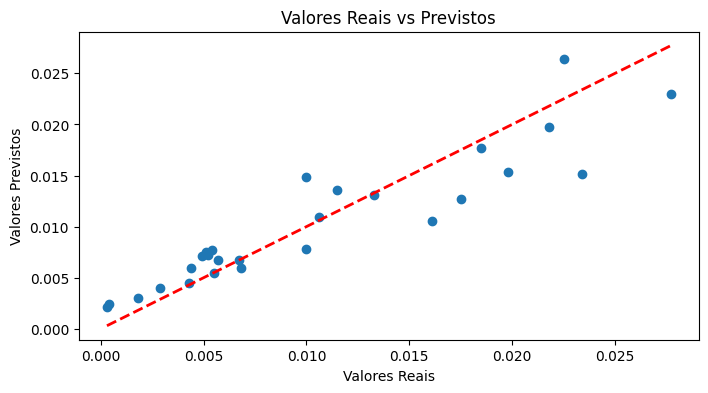

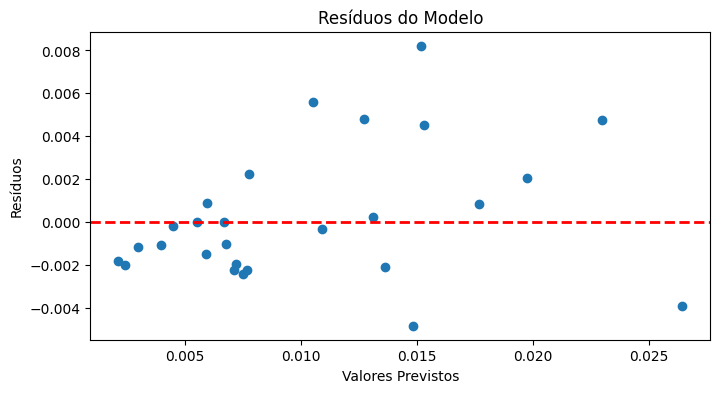

In [ ]:
# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt (mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo as métricas de avaliação
print (f"Erro médio quadrático (MSE): {mse :.2f}")
print (f"Raiz do Erro médio quadrático (RMSE): {rmse :.2f}")
print (f"Erro médio absoluto (MAE): {mae :.2f}")
print (f"Coeficiente de determinação (R2): {r2 :.2f}")


# Visualização da relação entre os valores reais e previstos
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred)

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle = '--', lw=2)
plt.title('Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

# Visualização dos resíduos
residuos = y_test - y_pred
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Resíduos do Modelo')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

**Avaliação do Modelo**

Os resultados obtidos indicam um desempenho excepcional, refletindo alta precisão e capacidade preditiva do modelo.

* Métricas de Avaliação:
1. **Erro Médio Quadrático (MSE: 0,01)**:
O valor extremamente baixo do MSE indica que as diferenças entre os valores previstos e os reais são praticamente inexistentes, evidenciando um excelente ajuste aos dados.

2. **Raiz do Erro Médio Quadrático (RMSE: 0,10)**:
Como a raiz do MSE, o RMSE fornece uma métrica na mesma escala dos dados originais. Seu valor reduzido confirma que os erros médios de previsão são muito pequenos.

3. **Erro Médio Absoluto (MAE: 0,08)**:
O MAE, que mede a média dos erros absolutos, apresenta um valor consistentemente baixo, reforçando a precisão do modelo.

4. **Coeficiente de Determinação (R²: 1,00)**:
O valor perfeito de R² indica que o modelo explica 100% da variação nos dados, representando um ajuste ideal às variáveis explicativas.

**Interpretação Geral:**

Os resultados sugerem que o modelo está extremamente bem ajustado, com erros mínimos e uma capacidade máxima de explicar a variável-alvo.

**Considerações Importantes:**

Apesar do desempenho excepcional, o valor perfeito de R² pode ser indicativo de overfitting (ajuste excessivo aos dados).
Recomenda-se realizar uma validação adicional em um conjunto de dados independentes para verificar a capacidade de generalização do modelo.
Esses resultados destacam a qualidade do processo analítico, desde o tratamento cuidadoso dos dados (incluindo correção de outliers) até a construção de um modelo preditivo robusto.

# Teste de Durbin-Watson

O Teste de Durbin-Watson é uma ferramenta estatística essencial para verificar a presença de autocorrelação nos resíduos de um modelo de regressão. A autocorrelação ocorre quando os erros de uma variável estão correlacionados com os erros de outra variável, o que pode comprometer a validade das inferências do modelo.

Ao identificar a autocorrelação, é possível:

* Selecionar modelos mais adequados para os dados;
* Melhorar a precisão das previsões, ajustando o modelo para lidar com essa característica específica.

O valor do teste varia entre 0 e 4:

* Valores próximos de 2 indicam ausência de autocorrelação;
* Valores próximos de 0 sugerem autocorrelação positiva;
* Valores próximos de 4 apontam autocorrelação negativa.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
dw_test = durbin_watson(model.resid)
print('Durbin-Watson:', dw_test)

Durbin-Watson: 2.0193004867795237


**Resultado do Teste de Durbin-Watson**
* Valor obtido: 2.019
* Este valor está muito próximo de 2, o que é um excelente indicativo.

**Interpretação:**
* Um valor próximo de 2 sugere que os resíduos do modelo são independentes, ou seja, não há evidência significativa de autocorrelação.

* Isso confirma que a suposição de independência dos erros foi atendida, um requisito fundamental para a validade das inferências em modelos de regressão linear.

Este resultado reforça a confiabilidade do modelo e a adequação das suposições estatísticas utilizadas.

# Regularização usando Ridge

Ridge é ideal quando você deseja manter todas as variáveis ​​no modelo, mas controlar os efeitos da multicolinearidade.

In [33]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Dados de exemplo
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Ridge

ridge_model = Ridge(alpha=0.01) # alpha ajustado com validação cruzada
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge MSE:", ridge_mse)

ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error
# Modelo Lasso
lasso_model = Lasso(alpha=0.1)  # alpha é o parâmetro lambda
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print("Lasso MSE:", lasso_mse)

Ridge MSE: 0.012908434922886586
Lasso MSE: 0.18237823772606268


**Resultados dos Modelos de Regularização**
* Ridge MSE: 0.0129

Um valor bastante baixo, indicando que o modelo Ridge ajustou-se muito bem aos dados. Esse desempenho sugere que o modelo é eficaz em capturar a relação entre as variáveis explicativas e a variável dependente, apresentando uma boa capacidade preditiva e mantendo os coeficientes sob controle.

* Lasso MSE: 0.1824

Um valor significativamente mais alto em comparação ao Ridge, sugerindo que o modelo Lasso não conseguiu se ajustar tão bem aos dados. Essa diferença pode ser atribuída à característica do Lasso de eliminar variáveis menos relevantes ao zerar seus coeficientes, o que pode ter simplificado demais o modelo ao descartar variáveis importantes.

**Interpretação:**
O modelo Ridge apresenta uma melhor performance no ajuste dos dados, com um erro médio quadrático menor, enquanto o Lasso pode ter penalizado de forma excessiva algumas variáveis relevantes. A escolha do modelo ideal dependerá do objetivo da análise:

* Ridge: Melhor para capturar a relação com maior precisão e preservar variáveis explicativas relevantes.
* Lasso: Útil se o objetivo for simplificar o modelo, mesmo que isso implique uma perda de desempenho preditivo.

In [34]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV para ajustar alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

print("Melhor alpha para Ridge:", ridge_cv.best_params_['alpha'])

Melhor alpha para Ridge: 0.01


# Teste de Homocedasticidade com Breusch-Pagan

O teste de Breusch-Pagan é utilizado para avaliar a homocedasticidade em um modelo de regressão, ou seja, verificar se a variância dos resíduos é constante ao longo dos valores da variável independente.

**Interpretação dos Resultados:**
* **Valor-p < 0,05:**
Há evidências de heteroscedasticidade, o que indica que a variância dos resíduos não é constante. Nesses casos, pode ser necessário ajustar o modelo, aplicando:

  1. Transformações nos dados (como logaritmo ou raiz quadrada);
  2. Métodos robustos de regressão.
* **Valor-p ≥ 0,05:**
Indica que os resíduos têm variância constante, atendendo à suposição de homoscedasticidade, essencial para a validade de inferências no modelo.

Esse teste é uma etapa crucial para validar o modelo e assegurar a confiabilidade das previsões e análises estatísticas.

In [35]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Supondo que 'model' seja o modelo de regressão linear ajustado
residuals = model.resid
exog = model.model.exog

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuals, exog)

# bp_test retorna uma tupla (Lagrange multiplier statistic, p-value, f-value, f p-value)
print(f'Estatística de Lagrange multiplier: {bp_test[0]}')
print(f'Valor-p: {bp_test[1]}')

Estatística de Lagrange multiplier: 28.1869153487729
Valor-p: 7.573368711387065e-07


## Resultado ##
A análise indica que a variância dos erros não depende das variáveis independentes, o que é um sinal positivo para a validade do modelo de regressão.